In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

In [219]:
grade_data = pd.read_excel('ODE_Grade_Data.xlsx')
print(grade_data.head())
#pd.DataFrame([[0, 1],[2,3]])

  Semester  HW1  HW2  HW3  HW4   HW5   HW6   HW7   HW8   HW9  ...  Midterm1  \
0     Sp22   10    0   10   10  10.0   0.0  10.0  10.0  10.0  ...     1.000   
1     Sp22   10   10    0   10  10.0  10.0  10.0  10.0  10.0  ...     0.725   
2     Sp22   10   10   10   10  10.0  10.0  10.0  10.0  10.0  ...     0.900   
3     Sp22   10   10   10   10  10.0  10.0  10.0  10.0  10.0  ...     0.575   
4     Sp22   10   10   10   10  10.0  10.0  10.0  10.0  10.0  ...     0.700   

   M1_ave_diff  M1_rel_ave  Midterm2  M2_ave_diff  M2_rel_ave     Final  \
0     0.177206   21.537087  0.789474    -0.000774   -0.097943  0.672727   
1    -0.097794  -11.885612  0.631579    -0.158669  -20.078355  0.690909   
2     0.077206    9.383378  0.763158    -0.027090   -3.428012  0.581818   
3    -0.247794  -30.116175  0.763158    -0.027090   -3.428012  0.618182   
4    -0.122794  -14.924039  0.342105    -0.448142  -56.709109  0.563636   

   Fin_ave_diff  Fin_rel_ave  Course Grade  
0     -0.102674   -13.241379 

In [222]:
early_data = grade_data[['HW1', 'HW2', 'HW3', 'HW4', 'Quiz1', 'Quiz2', 'Quiz3', 'Midterm1', 'M1_rel_ave']]
#print(early_data.head())
early_data.insert(4, 'HW Avg',early_data[['HW1','HW2','HW3','HW4']].mean(axis=1))
early_data.insert(8, 'Quiz Avg',early_data[['Quiz1','Quiz2','Quiz3']].mean(axis=1)/10)
#print(early_data.head())
#X = early_data[['Midterm1','HW Avg', 'Quiz Avg']].iloc[:90]
X = early_data[['Midterm1', 'Quiz Avg']].iloc[:90]
X2 = early_data[['M1_rel_ave', 'Quiz Avg']].iloc[:90]
#X = early_data.iloc[:90]
print(X2.head())


   M1_rel_ave  Quiz Avg
0   21.537087  0.666667
1  -11.885612  0.533333
2    9.383378  0.900000
3  -30.116175  0.700000
4  -14.924039  0.766667


In [223]:
y = ((grade_data['Course Grade'].iloc[:90] == 'A') + (grade_data['Course Grade'].iloc[:90] == 'B') + (grade_data['Course Grade'].iloc[:90] == 'C'))*1
print(y.tail())

85    1
86    1
87    1
88    1
89    1
Name: Course Grade, dtype: int64


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [244]:
svc = SVC(probability=True, random_state=0)
params = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10]} 
clf_prob = GridSearchCV(svc, params, scoring = 'roc_auc')
clf_prob.fit(X, y)
y_prob = clf_prob.predict_proba(X_test)[:,1]
print(y_prob)

from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(y_test,(y_prob>.6)*1))
print(roc_auc_score(y_test,y_prob))

[0.98208958 0.97645493 0.99059762 0.88487139 0.98253506 0.99252298
 0.46076049 0.95554726 0.67654664 0.96662721 0.8878819  0.84048621
 0.37897661 0.99472266 0.98941638 0.99527802 0.98304616 0.99442107
 0.96822218 0.988002   0.89993698 0.87063615 0.04122597]
0.9565217391304348
0.9605263157894737


In [139]:
svc = SVC(probability=False, random_state=0)
params = {'C':[0.001, 0.01, 0.1, 1], 'gamma':[0.001, 0.01, 0.1, 1]} 
clf = GridSearchCV(svc, params, scoring = 'accuracy')
clf.fit(X, y)
y_pred = clf.predict(X_test)
print(y_pred)

from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(y_test,y_pred))

[1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
0.9130434782608695


In [217]:
lr = LR(random_state=0)
params = {'C':[0.001, 0.01, 0.1, 1, 10, 100]} 
clf_lr = GridSearchCV(lr, params, scoring = 'roc_auc')
clf_lr.fit(X_train, y_train)
y_prob_lr = clf_lr.predict_proba(X_test)[:,1]
print(y_prob_lr)

from sklearn.metrics import accuracy_score, roc_auc_score
print(accuracy_score(y_test,(y_prob_lr>.6)*1))
print(roc_auc_score(y_test,y_prob_lr))

[0.96283685 0.94969112 0.97302623 0.83276368 0.96435124 0.97903826
 0.5614022  0.93276774 0.67614286 0.93035043 0.86829744 0.82677032
 0.48526469 0.9837556  0.97298863 0.98566021 0.96503742 0.98271206
 0.92741384 0.9691534  0.8690354  0.75987524 0.14580799]
0.9565217391304348
0.9605263157894737


In [238]:
#print(X_test)
#print(y_test)
pred_data = pd.concat([X_test, pd.Series(y_prob, index=y_test.index), y_test], axis=1).rename({0: 'Proba'}, axis = 1)
print(pred_data)


    Midterm1  Quiz Avg     Proba  Course Grade
2   0.900000  0.900000  0.985454             1
13  0.900000  0.733333  0.980550             1
53  0.974359  0.766667  0.992666             1
41  0.794872  0.466667  0.894235             0
66  0.897436  0.933333  0.985837             1
30  0.975000  0.900000  0.994247             1
45  0.589744  0.600000  0.451935             0
43  0.820513  0.900000  0.961716             1
78  0.685185  0.462778  0.680419             1
89  0.888889  0.597222  0.971807             1
7   0.750000  0.800000  0.897177             1
26  0.725000  0.733333  0.850016             1
33  0.575000  0.500000  0.366370             0
63  1.000000  0.933333  0.996024             1
8   0.950000  0.866667  0.991682             1
16  1.000000  1.000000  0.996465             1
24  0.900000  0.933333  0.986277             1
56  1.000000  0.900000  0.995783             1
77  0.907407  0.497222  0.973241             1
42  0.948718  0.800000  0.990499             1
22  0.775000 

In [ ]:
grade_data.iloc[6]

In [ ]:
plt.scatter(X,y)
plt.plot([0.6, 0.6],[0, 1], color = 'r')
plt.xlabel('Midterm 1 Score')
plt.ylabel('Pass Class')

In [ ]:
data = pd.concat([X['Midterm1'], y], axis=1)
print('Percent of students who finish the course and pass: ' + str(data['Course Grade'].mean()))
print(data['Course Grade'][data['Midterm1']>0.6].mean())
print(data['Course Grade'][data['Midterm1']<=0.6].mean())

In [ ]:
y_all_prob = clf.predict_proba(X)[:,1]
print(len(X))
pred_data = pd.concat([X, pd.Series(y_all_prob, index=y.index), y], axis=1).rename({0: 'Proba'}, axis = 1)
print(pred_data)
plt.scatter(pred_data['Midterm1'], pred_data['Proba'])
plt.xlabel('Midterm 1 Score')
plt.ylabel('Probability Pass Class')

In [119]:
data_fa23 = pd.read_excel('Fa23_EarlyGrades.xlsx')
data_fa23.insert(4, 'HW Avg', data_fa23[['HW1','HW2','HW3','HW4']].mean(axis=1))
data_fa23.insert(8, 'Quiz Avg', data_fa23[['Quiz1','Quiz2','Quiz3']].mean(axis=1)/10)
y_fa23 = ((data_fa23['Course Grade'].iloc[:90] == 'A') + (data_fa23['Course Grade'].iloc[:90] == 'B') + (data_fa23['Course Grade'].iloc[:90] == 'C'))*1
X_fa23 = data_fa23[['Midterm1', 'Quiz Avg']]

print(X_fa23.head())

   Midterm1  Quiz Avg
0  0.854167  0.766667
1  0.812500  0.566667
2  0.958333  0.900000
3  0.895833  0.900000
4  0.875000  0.866667


Text(0, 0.5, 'Probability Pass Class')

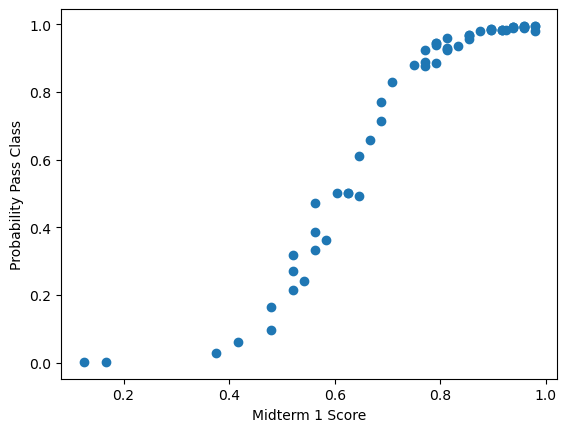

In [141]:
y_fa23_prob = clf_prob.predict_proba(X_fa23)[:,1]
#pred_data = pd.concat([X_fa23, pd.Series(X_fa23_prob, index=X_fa23.index), y], axis=1).rename({0: 'Proba'}, axis = 1)
plt.scatter(X_fa23['Midterm1'], y_fa23_prob)
plt.xlabel('Midterm 1 Score')
plt.ylabel('Probability Pass Class')

In [142]:
print(f'Number of students expected to pass: {sum(y_fa23_prob>.3):.0f}')
print(f'Number of students expected to fail: {len(X_fa23) - sum(y_fa23_prob>.3):.0f}')
print(sum((X_fa23['Midterm1']<=0.7)*1))
#print(f'Number of students who scored under 60\%: {sum((X_fa23['Midterm1']<=0.6)*1):.1f}')

Number of students expected to pass: 53
Number of students expected to fail: 9
22


In [35]:
print(y_fa23_prob)

[0.86392921 0.75828942 0.86191711 0.86293831 0.74763727 0.88052887
 0.69597428 0.88119382 0.74008954 0.69680801 0.85738469 0.54662198
 0.70928151 0.86112958 0.85118934 0.082312   0.86328445 0.87435576
 0.87074918 0.86580671 0.86293831 0.74952322 0.74740626 0.85787859
 0.87843247 0.40507556 0.81649014 0.86579306 0.80361904 0.88125714
 0.58446843 0.80612455 0.73626816 0.66773777 0.76845612 0.86355421
 0.86560215 0.03383233 0.79541281 0.60890164 0.22735997 0.67344334
 0.42503442 0.86514928 0.87543413 0.87109403 0.86232589 0.82915483
 0.61510136 0.82406302 0.86392921 0.8041588  0.72468751 0.79255342
 0.89733523 0.84933888 0.87215537 0.45207523 0.88398727 0.86906578
 0.79953068 0.87903671]


In [149]:
print(accuracy_score(y_fa23,(y_fa23_prob>.3)*1))

0.9193548387096774


In [153]:
results = pd.concat([y_fa23, pd.Series((y_fa23_prob>.3)*1, index = y_fa23.index)], axis=1)
results = results.rename(columns = {'Course Grade': "Pass", 0: 'Predict Pass'})
results.insert(2, 'Correct?', results['Pass'] - results['Predict Pass'])
print(results[results['Correct?'] != 0])

    Pass  Predict Pass  Correct?
15     0             1        -1
34     0             1        -1
41     1             0         1
48     1             0         1
51     0             1        -1


In [150]:
print(results[results['Predict Pass']==0])

    Pass  Predict Pass  Correct?
21     0             0         0
22     0             0         0
25     0             0         0
37     0             0         0
40     0             0         0
41     1             0         1
42     0             0         0
48     1             0         1
51     0             0         0


In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_fa23, (y_fa23_prob>.79)*1)

array([[ 8,  2],
       [ 2, 50]])

In [155]:
y_fa23_pred = clf.predict(X_fa23)

In [156]:
print(accuracy_score(y_fa23,y_fa23_pred))

0.8870967741935484


In [196]:
results = pd.concat([y_fa23, pd.Series((y_fa23_prob>.3)*1, index = y_fa23.index)], axis=1)
results = results.rename(columns = {'Course Grade': "Pass", 0: 'Predict Pass'})
results.insert(2, 'False Pos', (results['Pass'] == 0)*(results['Predict Pass']==1)*1)
results.insert(2, 'False Neg', (results['Pass'] == 1)*(results['Predict Pass']==0)*1)
print(results)

    Pass  Predict Pass  False Neg  False Pos
0      1             1          0          0
1      1             1          0          0
2      1             1          0          0
3      1             1          0          0
4      1             1          0          0
..   ...           ...        ...        ...
57     0             0          0          0
58     1             1          0          0
59     1             1          0          0
60     1             1          0          0
61     1             1          0          0

[62 rows x 4 columns]


In [158]:
print(f'Number of students expected to pass: {sum(y_fa23_pred>.3):.0f}')
print(f'Number of students expected to fail: {len(X_fa23) - sum(y_fa23_pred>.3):.0f}')
print(sum((X_fa23['Midterm1']<=0.7)*1))
#print(f'Number of students who scored under 60\%: {sum((X_fa23['Midterm1']<=0.6)*1):.1f}')

Number of students expected to pass: 51
Number of students expected to fail: 11
22


In [159]:
confusion_matrix(y_fa23, (y_fa23_pred>.79)*1)

array([[ 7,  3],
       [ 4, 48]])

    Midterm1  Quiz Avg  Pass  Predict Pass  False Neg  False Pos
15  0.645833  0.300000     0             1          0          1
34  0.979167  0.133333     0             1          0          1
41  0.520833  0.633333     1             0          1          0
48  0.520833  0.466667     1             0          1          0
51  0.520833  0.766667     0             1          0          1


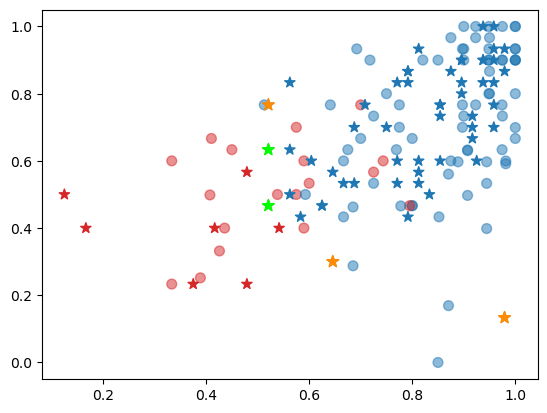

In [240]:
train_data = pd.concat([X, y], axis = 1).rename(columns = {'Course Grade': 'Pass'})
pred_data = pd.concat([X_fa23, results], axis = 1)
pred_wrong = pred_data[(pred_data['False Neg']==1)+(pred_data['False Pos']==1)]
print(pred_wrong)

c_dict_train = {0: 'tab:red', 1: 'tab:blue'}
c_dict_pred = {0: 'lime', 1: 'darkorange'}

c_train = [c_dict_train[x] for x in train_data['Pass'].values]
c_pred = [c_dict_train[x] for x in pred_data['Predict Pass'].values]
c_pred_wrong = [c_dict_pred[x] for x in pred_wrong['Predict Pass'].values]

plt.scatter(train_data['Midterm1'], train_data['Quiz Avg'], c = c_train, alpha = 0.5, s = 50)
plt.scatter(pred_data['Midterm1'], pred_data['Quiz Avg'], c = c_pred, alpha = 1, s = 60, marker = '*')
plt.scatter(pred_wrong['Midterm1'], pred_wrong['Quiz Avg'], c = c_pred_wrong, alpha = 1, s = 80, marker = '*')